# Generate seurat object


In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import os
import sys
from scipy import sparse



sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
sys.executable

'/home/jovyan/my-conda-envs/scanpy_1.9.2/bin/python'

## Load data for samples of interest

In [2]:
path_to_data = '/nfs/team292/lg18/endometriosis/integrated_objects/cells_immune_integrated.h5ad'
adata = sc.read(path_to_data)
adata.obs.head()

,n_genes,sample,library,StudyName,SampleID,Lane,Processing,Type,BiopsyType,BiopsyType_II,...,total_counts_MT,pct_counts_MT,S_score,G2M_score,phase,ssa_lineage,Ectopic_EcP_EcO_EcPA_EcP-D,dataset,barcode,Mareckova_celltype
HCA_A_RepT_RNA13247830_AACCGCGAGCTAACTC-Mareckova,1308,HCA_A_RepT_RNA13247830,HCA_A_RepT_RNA13247830,CBTM,HCA_A_RepT_RNA13247830,0.0,Fresh,Cells,Organ_Donor,NaN,...,372.0,15.669756,-0.088435,-0.196080,G1,NaN,NaN,Mareckova,NaN,Immune_Lymphoid
HCA_A_RepT_RNA13247830_AACGTTGGTTCGCTAA-Mareckova,1051,HCA_A_RepT_RNA13247830,HCA_A_RepT_RNA13247830,CBTM,HCA_A_RepT_RNA13247830,0.0,Fresh,Cells,Organ_Donor,NaN,...,137.0,7.810719,-0.037415,-0.212121,G1,NaN,NaN,Mareckova,NaN,Immune_Lymphoid
HCA_A_RepT_RNA13247830_AACTTTCCAGTAACGG-Mareckova,2259,HCA_A_RepT_RNA13247830,HCA_A_RepT_RNA13247830,CBTM,HCA_A_RepT_RNA13247830,0.0,Fresh,Cells,Organ_Donor,NaN,...,221.0,3.914276,-0.202381,-0.040087,G1,NaN,NaN,Mareckova,NaN,Immune_Lymphoid
HCA_A_RepT_RNA13247830_AAGTCTGCATTGAGCT-Mareckova,1252,HCA_A_RepT_RNA13247830,HCA_A_RepT_RNA13247830,CBTM,HCA_A_RepT_RNA13247830,0.0,Fresh,Cells,Organ_Donor,NaN,...,343.0,15.879629,-0.025510,-0.216814,G1,NaN,NaN,Mareckova,NaN,Immune_Lymphoid
HCA_A_RepT_RNA13247830_AATCCAGCATAGAAAC-Mareckova,1861,HCA_A_RepT_RNA13247830,HCA_A_RepT_RNA13247830,CBTM,HCA_A_RepT_RNA13247830,0.0,Fresh,Cells,Organ_Donor,NaN,...,235.0,5.096508,-0.144558,-0.210158,G1,NaN,NaN,Mareckova,NaN,Immune


In [3]:
new_names = {'cDC1':'cDC1',
 'Red_Blood_Cell':'Red_blood_cell',
 'T_Reg':'T_Reg',
 'eM2':'eM2',
 'CD8_T':'T_cell_CD8',
 'uNK1':'uNK1',
 'Monocyte':'Monocyte',
 'pDC':'pDC',
 'ILC3':'ILC3',
 'Doublet':'Doublet',
 'eM1':'eM1',
 'uNK2':'uNK2',
 'uNK3':'uNK3',
 'cDC2':'cDC2',
 'CD4_T':'T_cell_CD4',
 'B_Cell':'B_cell',
 'Peripheral_Lymphocyte':'Peripheral_lymphocyte',
 'Cycling_T_Cell':'T_cell_cycling',
 'Mast_Cell':'Mast_cell',
 'Plasma_B_Cell':'Plasma_B_cell',
 'Cycling_uNK1':'uNK1_cycling'}

/tmp/ipykernel_3948/2795800532.py:1: DtypeWarning: Columns (11,13,15,17,18,19,21,22,23,24,25,41,42,46,55,58) have mixed types. Specify dtype option on import or set low_memory=False.
  annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/cells_endometrium_immune.csv',index_col=0)


celltype
T_cell_CD8               5580
uNK2                     4370
T_cell_CD4               4297
eM1                      3854
uNK3                     3716
uNK1                     1644
eM2                      1643
B_cell                   1163
Doublet                  1114
Peripheral_lymphocyte    1099
ILC3                      869
uNK1_cycling              741
cDC2                      693
T_Reg                     667
Monocyte                  647
Mast_cell                 465
T_cell_cycling            331
pDC                       223
cDC1                      188
Plasma_B_cell              89
Red_blood_cell             43
Name: count, dtype: int64


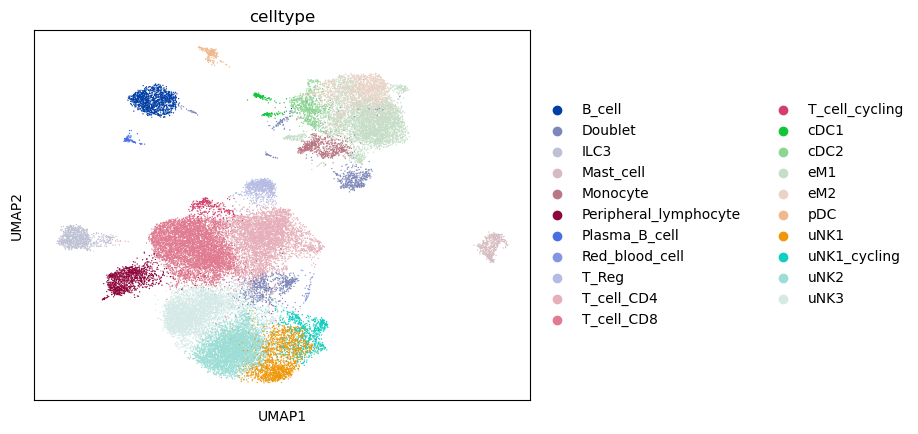

In [4]:
annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/cells_endometrium_immune.csv',index_col=0)
annot_df['immune_subcluster_labels'] = annot_df.immune_subcluster_labels.map(new_names)
annot_df.head()
annot = annot_df['immune_subcluster_labels'].to_dict()

adata.obs['celltype'] = adata.obs_names.map(annot)
print(adata.obs['celltype'].value_counts())
sc.pl.umap(adata, color=['celltype'])

### Exclude unwanted clusters

In [5]:
adata = adata[[ i not in ['Doublet'] for i in adata.obs['celltype'] ]]
adata = adata[[ 'cycling' not in i for i in adata.obs['celltype'] ]]
print(adata.obs['celltype'].value_counts())

celltype
T_cell_CD8               5580
uNK2                     4370
T_cell_CD4               4297
eM1                      3854
uNK3                     3716
uNK1                     1644
eM2                      1643
B_cell                   1163
Peripheral_lymphocyte    1099
ILC3                      869
cDC2                      693
T_Reg                     667
Monocyte                  647
Mast_cell                 465
pDC                       223
cDC1                      188
Plasma_B_cell              89
Red_blood_cell             43
Name: count, dtype: int64


### Subset to Ctrl donors in either prolif/secretory phase

In [6]:
adata = adata[[ i in ['Secretory', 'Proliferative'] for i in adata.obs['Binary Stage'] ]]
set(adata.obs['Binary Stage'] )

{'Proliferative', 'Secretory'}

In [7]:
adata = adata[[ i in ['Ctrl_Superficial'] for i in adata.obs['Group'] ]]
set(adata.obs['Group'] )

{'Ctrl_Superficial'}

In [8]:
adata.X.shape

(10312, 17766)

In [9]:
pd.crosstab(adata.obs['Binary Stage'], adata.obs.celltype )

celltype,B_cell,ILC3,Mast_cell,Monocyte,Peripheral_lymphocyte,Plasma_B_cell,Red_blood_cell,T_Reg,T_cell_CD4,T_cell_CD8,cDC1,cDC2,eM1,eM2,pDC,uNK1,uNK2,uNK3
Binary Stage,,,,,,,,,,,,,,,,,,
Proliferative,31,134,17,43,144,47,38,89,886,1039,31,111,198,347,84,87,612,594
Secretory,175,268,25,80,319,10,2,83,823,1266,40,122,254,234,31,417,737,894


In [10]:
adata.obsp

PairwiseArraysView with keys: connectivities, distances

In [13]:
import pickle

X_scVI = adata.obsm['X_scVI']
fileObj = open('/nfs/team292/lg18/endometriosis/integrated_objects/cells_immune_integrated_X_scVI.obj', 'wb')
pickle.dump(X_scVI,fileObj)
fileObj.close()

X_umap = adata.obsm['X_umap']
fileObj = open('/nfs/team292/lg18/endometriosis/integrated_objects/cells_immune_integrated_X_umap.obj', 'wb')
pickle.dump(X_umap,fileObj)
fileObj.close()